<a href="https://colab.research.google.com/github/19rehan/ML-Projects/blob/main/Multi_class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multi-class Classification


In this Project, you will learn the different strategies of Multi-class classification and implement the same on a real-world dataset.

#Objectives
#After completing this lab you will be able to:

Understand the use of one-hot encoding for categorical variables.
Implement logistic regression for multi-class classification using One-vs-All (OvA) and One-vs-One (OvO) strategies.
Evaluate model performance using appropriate metrics.
Import Necessary Libraries
First, to ensure the availability of the required libraries, execute the cell below.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [6]:
date_set_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"
df = pd.read_csv(date_set_url)
df.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1153,Male,23.603191,1.714508,85.137113,yes,yes,2.319776,2.884848,Sometimes,no,2.154898,no,0.325534,0.954216,Sometimes,Public_Transportation,Overweight_Level_II
491,Male,25.000000,1.660000,68.000000,no,yes,2.000000,3.000000,Sometimes,yes,1.000000,no,1.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1518,Male,30.421596,1.819296,122.137917,yes,yes,2.000000,3.000000,Sometimes,no,1.984323,no,0.793262,0.000000,Sometimes,Public_Transportation,Obesity_Type_II
1852,Female,21.700748,1.789555,137.767787,yes,yes,3.000000,3.000000,Sometimes,no,2.832659,no,1.505775,0.923005,Sometimes,Public_Transportation,Obesity_Type_III
1011,Male,34.389906,1.681080,83.568035,yes,yes,2.000000,1.660768,Sometimes,no,2.482294,no,0.891205,0.000000,no,Automobile,Overweight_Level_II


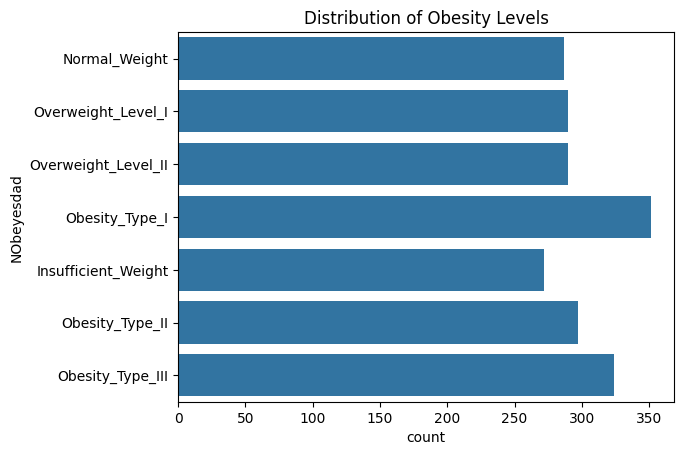

In [13]:
sns.countplot(y ="NObeyesdad", data = df)
plt.title("Distribution of Obesity Levels")
plt.show()

In [17]:
print(df.isnull().sum())

print(df.info())
print(df.describe())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height             

In [38]:
#Standardize

In [22]:
continous_values = df.select_dtypes(include = 'float64').columns.tolist()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[continous_values])

scaled_df = pd.DataFrame(scaled_features, columns = scaler.get_feature_names_out(continous_values))

scaled_data = pd.concat([df.drop(columns = continous_values),scaled_df], axis = 1)

In [39]:
#One Hot Encoding

In [40]:
# Identifying categorical columns
categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('NObeyesdad')  # Exclude target column

# Applying one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

# Converting to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Combining with the original dataset
prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)

In [41]:
prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes
prepped_data.head()

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [42]:
# Preparing final dataset
X = prepped_data.drop('NObeyesdad', axis=1)
y = prepped_data['NObeyesdad']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2 , random_state = 42, stratify = y)

In [47]:
model_ova = LogisticRegression(multi_class = 'ovr', max_iter = 1000)

model_ova.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [48]:
# Predictions
y_pred_ova = model_ova.predict(X_test)

# Evaluation metrics for OvA
print("One-vs-All (OvA) Strategy")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ova),2)}%")

One-vs-All (OvA) Strategy
Accuracy: 76.12%


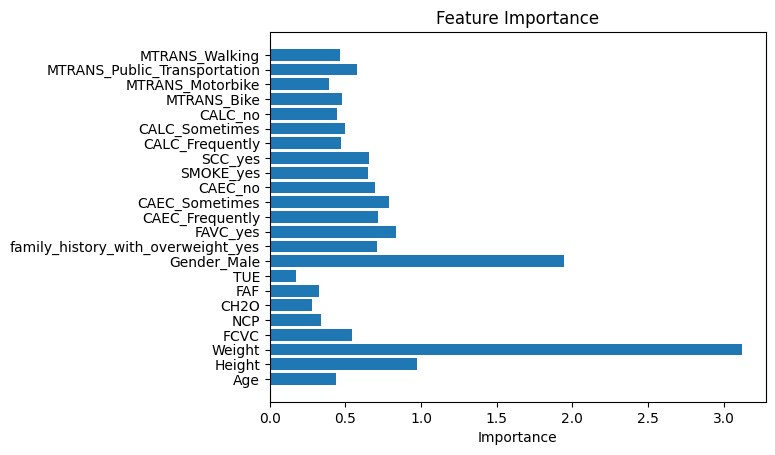

AttributeError: 'LogisticRegression' object has no attribute 'estimators_'

In [51]:
# Feature importance
feature_importance = np.mean(np.abs(model_ova.coef_), axis=0)
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()

# For One vs One model
# Collect all coefficients from each underlying binary classifier
coefs = np.array([est.coef_[0] for est in model_ova.estimators_])

# Now take the mean across all those classifiers
feature_importance = np.mean(np.abs(coefs), axis=0)

# Plot feature importance
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance (One-vs-One)")
plt.xlabel("Importance")
plt.show()

#**Entire Project in a simple Function**

In [54]:
# write your function here and then execute this cell
def obesity_risk_pipeline(data_path, test_size=0.2):
# your code here
    data = pd.read_csv(data_path)

    # Standardizing continuous numerical features
    continuous_columns = data.select_dtypes(include=['float64']).columns.tolist()
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data[continuous_columns])

    # Converting to a DataFrame
    scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))

    # Combining with the original dataset
    scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

    # Identifying categorical columns
    categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove('NObeyesdad')  # Exclude target column

    # Applying one-hot encoding
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

    # Converting to a DataFrame
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

    # Combining with the original dataset
    prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)

    # Encoding the target variable
    prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes

    # Preparing final dataset
    X = prepped_data.drop('NObeyesdad', axis=1)
    y = prepped_data['NObeyesdad']

    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # Training and evaluation
    model = LogisticRegression(multi_class='multinomial', max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))

obesity_risk_pipeline(date_set_url, test_size=0.2)

Accuracy: 0.8794326241134752
